# Lab 01: Urbana Weather

---
author: Brady Brooks
date: September 6, 2024
embed-resources: true
---

## Introduction

In this report, we develop a model to estimate the minimum daily temperature in Urbana, IL. This is so we can make a decision as to when we should move the markets indoors in Autumn. Some markets don't move to indoors so we want to maximize the amount of time the markets can be outside for until the temoerature drops too low. In order to accomplish this, we will use a KNeighborsRegressor model. This model can be used for other cities as well and can be used for other senerios where someone may need to know the minimum temperature of each day. 

## Methods

In [21]:
# imports
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
import matplotlib.pyplot as plt

### Data

In [22]:
# load data
weather_train = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-train.csv",
    index_col="date",
    parse_dates=True
)
weather_vtrain = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-vtrain.csv",
    index_col="date",
    parse_dates=True
)
weather_validation = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-validation.csv",
    index_col="date",
    parse_dates=True
)
weather_test = pd.read_csv(
    "https://cs307.org/lab-01/data/weather-test.csv",
    index_col="date",
    parse_dates=True
)

The Urbana Weather data was collected using the Open-Metro API. The Urbana Weather data was assessed using: 

Latitude: 40.1106 - Longitude: -88.2073

Train data is from years 2016-2021, Validation-Train data is from years 2016-2019, Validation data is from years 2020-2021, and finally Test data is from 2022. Each data frame has one row per day in their respective years. The variables considered are:

### Response
temperature_2m_min
-   [float64] Minimum air temperature at 2 meters above the ground for that day 

### Features
-   [int64] year (which year it is, such as 2020)
-   [int64] month (which month of the year it is, such as 3 for March)
-   [int64] day (which day of the month it is, 11 such as January 11)
-   [int64] day_of_year (the date of the year, such as 100, which for non-leap years is April 9)

In [23]:
# summary statistics
for month in weather_train["month"].unique():
    print(month)
    temp = weather_train[weather_train["month"] == month]
    print(temp["temperature_2m_min"].describe().loc[['mean', 'std']])

1
mean   -4.999336
std     6.752006
Name: temperature_2m_min, dtype: float64
2
mean   -3.856209
std     6.760570
Name: temperature_2m_min, dtype: float64
3
mean    1.577277
std     5.615212
Name: temperature_2m_min, dtype: float64
4
mean    5.985861
std     5.615279
Name: temperature_2m_min, dtype: float64
5
mean    12.446632
std      5.342291
Name: temperature_2m_min, dtype: float64
6
mean    18.240583
std      3.492687
Name: temperature_2m_min, dtype: float64
7
mean    19.975933
std      2.632969
Name: temperature_2m_min, dtype: float64
8
mean    19.136954
std      2.889118
Name: temperature_2m_min, dtype: float64
9
mean    16.793083
std      3.815779
Name: temperature_2m_min, dtype: float64
10
mean    10.102277
std      5.852142
Name: temperature_2m_min, dtype: float64
11
mean    1.780861
std     5.523113
Name: temperature_2m_min, dtype: float64
12
mean   -2.210358
std     5.433891
Name: temperature_2m_min, dtype: float64


In [24]:
for year in weather_train["year"].unique():
    print(year)
    temp = weather_train[weather_train["year"] == year]
    print(temp["temperature_2m_min"].describe().loc[['count','mean','std']])

2016
count    366.000000
mean       8.793391
std       10.274506
Name: temperature_2m_min, dtype: float64
2017
count    365.000000
mean       8.399644
std        9.692305
Name: temperature_2m_min, dtype: float64
2018
count    365.000000
mean       7.591014
std       11.369452
Name: temperature_2m_min, dtype: float64
2019
count    365.000000
mean       7.229781
std       10.882260
Name: temperature_2m_min, dtype: float64
2020
count    366.000000
mean       7.684612
std        9.383593
Name: temperature_2m_min, dtype: float64
2021
count    365.000000
mean       8.119370
std       10.388489
Name: temperature_2m_min, dtype: float64


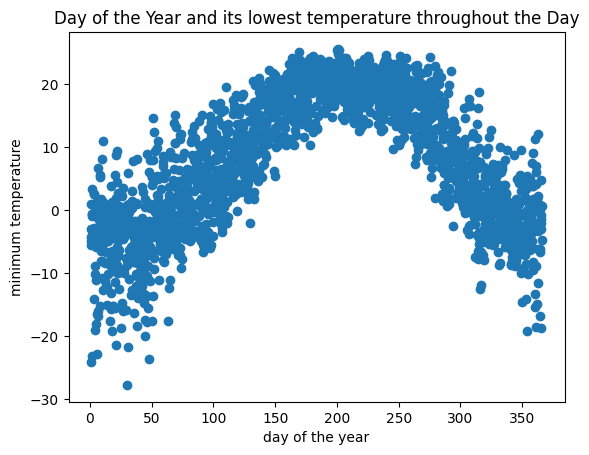

In [25]:
# visualizations
plt.scatter(weather_train["day_of_year"], weather_train["temperature_2m_min"])
plt.xlabel("day of the year")
plt.ylabel("minimum temperature")
plt.title("Day of the Year and its lowest temperature throughout the Day")
plt.show()

Breaking down the data by days of the year, we can see that the temperature is much warmer is the middle of the year and much cooler at beginning and end of the year. It starts to heat up a few months in and it starts to cool down with only a few months remaining. 

### Models

In [26]:
# process data for ML
# create X and y for train
X_train = weather_train[["year", "day_of_year"]]
y_train = weather_train["temperature_2m_min"]

# create X and y for validation-train
X_vtrain = weather_vtrain[["year", "day_of_year"]]
y_vtrain = weather_vtrain["temperature_2m_min"]

# create X and y for validation
X_validation = weather_validation[["year", "day_of_year"]]
y_validation = weather_validation["temperature_2m_min"]

# create X and y for test
X_test = weather_test[["year", "day_of_year"]]
y_test = weather_test["temperature_2m_min"]

In [27]:
# train models
# initialize model
knn = KNeighborsRegressor(n_neighbors=100)

# fit model to vtrain
knn.fit(X_vtrain, y_vtrain)

# make some predictions 
pred_val = knn.predict(X_validation)

In [28]:
mod = knn

We consider a single KNeighborsRegresser, tuned by checking which k value of 1, 10, or 100, would yield the smalled RMSE score.

## Results

In [29]:
# report model metrics
root_mean_squared_error(y_validation, pred_val)

np.float64(4.70645988033388)

The selected model achieves a RMSE of 4.70645988033388.

In [30]:
from joblib import dump
dump(mod, "urbana-weather.joblib")

['urbana-weather.joblib']

## Discussion

While an RMSE of 4.7 is better than 5.5, the model is still of limited use. 

The strategy is appropriate but it is difficult to predict weather so far in advance because of its major inconsistencies day to day and the increas of global warming. This would mean that in the future it won't get as cool as soon as it does now. By using KNN, distance makes sense here because it is paired with features such as day of the year. This helps find trends throughout the year. The distance between two dates in time for this data is usually within a month or its a month plus or minus a year or two. This makes sense becasue it is capturing that time of year's trend in temperature.

### Conclusion

Given that the Urbana weather is extremely inconsistent and global warming is occuring, we do not recommend this model for use in practice at this time.